In [31]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib import cm
from typing import Callable

# Calculations for function of any dimension

def gradient(func, pos, eps):
    pos = np.array(pos)
    pos_changing = np.array(pos)

    grad = []

    for i in range(len(pos)):
        pos_changing[i] = pos[i] + eps

        grad.append((func(pos_changing) - func(pos)) / eps)

    return tuple(grad)

def gradDescIter(func, pos, eps, rate):
    grad = np.array(gradient(func, pos, eps))

    return tuple(np.array(pos) - rate*grad)    

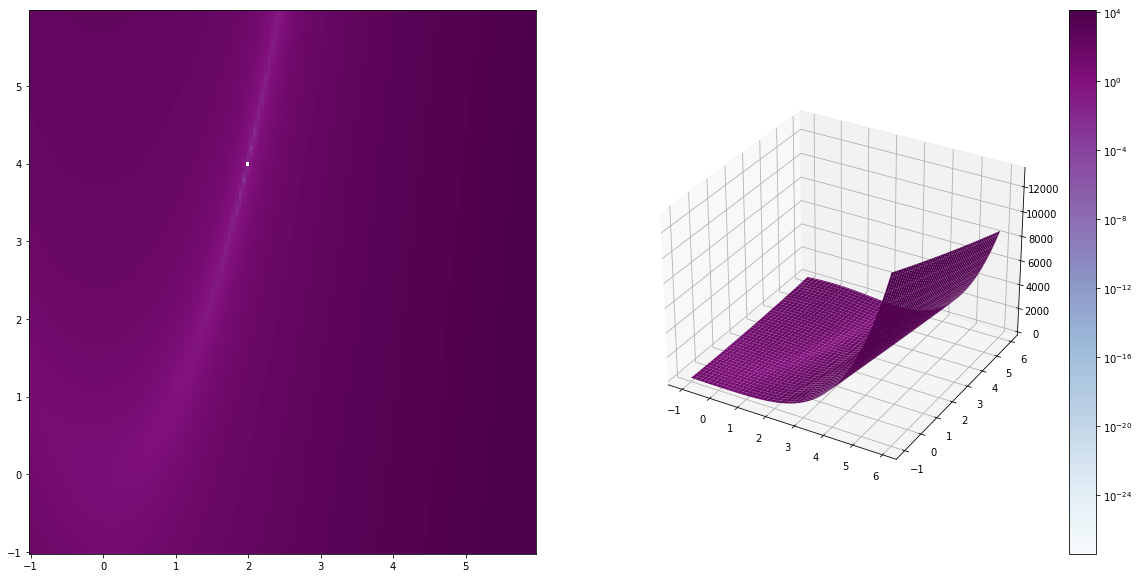

In [44]:
# We will use the Rosenbrock function for demonstration purposes

rosenbrock = lambda t: (1-t[0])**2 + 100*(t[1]-t[0]**2)**2
x_lo = -1
x_hi = 6
y_lo = -1
y_hi = 6

#Another function for testing
# matyas = lambda t: 0.26 * (t[0]**2 + t[1]**2) - 0.48 * t[0] * t[1]
# x_lo = -10
# x_hi = 10
# y_lo = -10
# y_hi = 10

func = rosenbrock

xx = np.arange(x_lo, x_hi, 0.05)
yy = np.arange(y_lo, y_hi, 0.05)

xm, ym = np.meshgrid(xx, yy)

zz = func((xm, ym))

fig = plt.figure()
fig.set_size_inches(20, 10)

top_down = fig.add_subplot(121)

c = top_down.pcolor(xm, ym, zz, cmap=cm.BuPu, norm=matplotlib.colors.LogNorm(vmin=zz.min(), vmax=zz.max()), shading='auto')

surface = fig.add_subplot(122, projection='3d')

surface.plot_surface(xm, ym, zz, cmap=cm.BuPu, norm=matplotlib.colors.LogNorm(vmin=zz.min(), vmax=zz.max()))

fig.colorbar(c)

plt.show()

In [45]:
# Generate descent path from different starting points

rate = 0.001
eps = 0.0005
iterations = 50000

iter_steps = []

for i in np.linspace(x_lo, x_hi, 2):
    for j in np.linspace(y_lo, y_hi, 2):
        iter_steps.append([(i, j)])

for _ in range(iterations):
    for i in range(len(iter_steps)):
        iter_steps[i] += [gradDescIter(func, iter_steps[i][-1], eps, rate)]


min_avg = list(iter_steps[0][-1])

for i in range(1, len(iter_steps)):
    for j in range(len(min_avg)):
        min_avg[j] += iter_steps[i][-1][j]

min_avg = np.array(min_avg)
min_avg /= len(iter_steps)

print(min_avg)

[2.03045457 4.12451781]


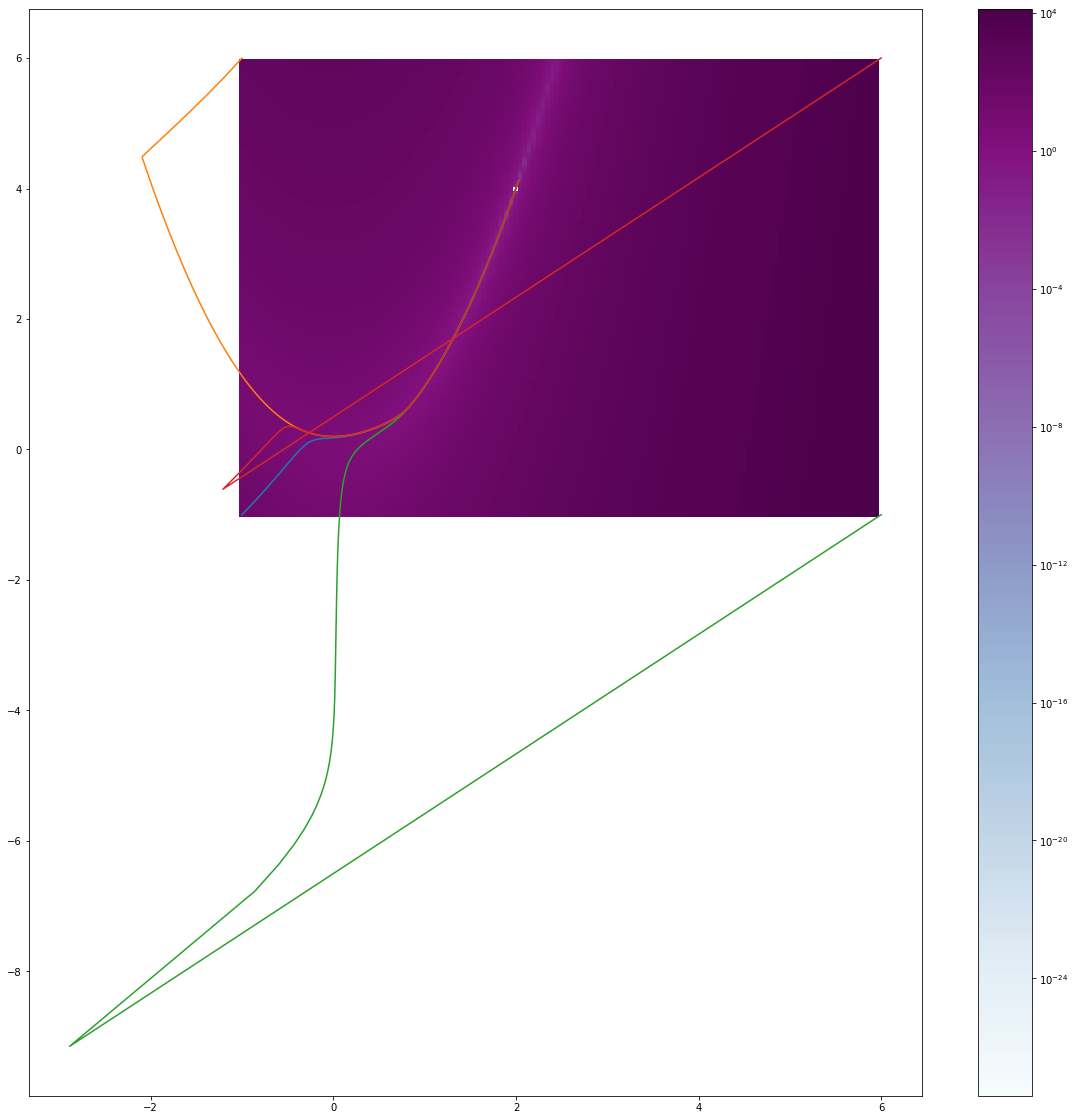

In [46]:
# Plot all the descent paths
fig = plt.figure()
fig.set_size_inches(20, 20)

top_down = fig.add_subplot(111)

c = top_down.pcolor(xm, ym, zz, cmap=cm.BuPu, norm=matplotlib.colors.LogNorm(vmin=zz.min(), vmax=zz.max()), shading='auto')

for i in iter_steps:
    top_down.plot([j[0] for j in i], [j[1] for j in i])

fig.colorbar(c)

plt.show()